In [1]:
import pandas as pd # for data manipulation
import seaborn as sns # for data visualization
import matplotlib.pyplot as plt # for data visualization
import numpy as np # for numerical operations
import scipy.stats as scs # for statistical analysis

In [2]:
empdf = pd.read_csv('datasets/employees.csv')

In [3]:
empdf.head()

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
0,Douglas,Male,8/6/1993,12:42 PM,97308,6.945,True,Marketing
1,Thomas,Male,3/31/1996,6:53 AM,61933,4.170,True,NaN
2,Maria,Female,4/23/1993,11:17 AM,130590,11.858,False,Finance
3,Jerry,Male,3/4/2005,1:00 PM,138705,9.340,True,Finance
4,Larry,Male,1/24/1998,4:47 PM,101004,1.389,True,Client Services


In [4]:
empdf.describe()

,Salary,Bonus %
count,1000.000000,1000.000000
mean,90662.181000,10.207555
std,32923.693342,5.528481
min,35013.000000,1.015000
25%,62613.000000,5.401750
50%,90428.000000,9.838500
75%,118740.250000,14.838000
max,149908.000000,19.944000


# Analyzing for missing values

In [5]:
empdf.isnull().sum()

First Name            67
Gender               145
Start Date             0
Last Login Time        0
Salary                 0
Bonus %                0
Senior Management     67
Team                  43
dtype: int64

# Handling missing Values
## Two ways to treat them
- dropna()
- fillna()
### Notes
- go with qualitative first
- then quantitative

In [6]:
empdf["Team"].mode()


0    Client Services
Name: Team, dtype: object

In [7]:
empdf["Team"].fillna("Other", inplace=True)

In [8]:
empdf["Gender"].mode()

0    Female
Name: Gender, dtype: object

In [9]:
empdf["Gender"].fillna("N/A", inplace=True)

In [10]:
empdf.isnull().sum()

First Name           67
Gender                0
Start Date            0
Last Login Time       0
Salary                0
Bonus %               0
Senior Management    67
Team                  0
dtype: int64

In [11]:
empdf["Senior Management"].fillna("N/A", inplace=True)
empdf["First Name"].fillna("N/A", inplace=True)

In [12]:
empdf.isnull().sum()

First Name           0
Gender               0
Start Date           0
Last Login Time      0
Salary               0
Bonus %              0
Senior Management    0
Team                 0
dtype: int64

## Performing iloc

In [13]:
empdf.iloc[990:996]

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
990,Robin,Female,7/24/1987,1:35 PM,100765,10.982,True,Client Services
991,Rose,Female,8/25/2002,5:12 AM,134505,11.051,True,Marketing
992,Anthony,Male,10/16/2011,8:35 AM,112769,11.625,True,Finance
993,Tina,Female,5/15/1997,3:53 PM,56450,19.040,True,Engineering
994,George,Male,6/21/2013,5:47 PM,98874,4.479,True,Marketing
995,Henry,N/A,11/23/2014,6:09 AM,132483,16.655,False,Distribution


## Checking for duplicates and outliers

In [14]:
empdf.duplicated().sum()

0

In [15]:
duplicate_rows = empdf[empdf.duplicated(keep=False)]
print(duplicate_rows)

Empty DataFrame
Columns: [First Name, Gender, Start Date, Last Login Time, Salary, Bonus %, Senior Management, Team]
Index: []


In [16]:
duplicate_rows = empdf[empdf.duplicated(subset=["First Name","Gender"], keep="first")]
print(duplicate_rows)

    First Name  Gender Start Date Last Login Time  Salary  Bonus %  \
25         N/A    Male  10/8/2012         1:12 AM   37076   18.576   
32         N/A    Male  8/21/1998         2:27 PM  122340    6.417   
34       Jerry    Male  1/10/2004        12:56 PM   95734   19.096   
39         N/A    Male  1/29/2016         2:33 AM  122173    7.797   
58     Theresa  Female  4/11/2010         7:18 AM   72670    1.481   
..         ...     ...        ...             ...     ...      ...   
994     George    Male  6/21/2013         5:47 PM   98874    4.479   
996    Phillip    Male  1/31/1984         6:30 AM   42392   19.675   
997    Russell    Male  5/20/2013        12:39 PM   96914    1.421   
998      Larry    Male  4/20/2013         4:45 PM   60500   11.985   
999     Albert    Male  5/15/2012         6:24 PM  129949   10.169   

    Senior Management                  Team  
25                N/A       Client Services  
32                N/A                 Other  
34              False

# Notes
## Qualitative
- if missing values > 20% drop the column
- otherwise fillna() or with mode
## Quantitative
- otherwise fill with a suitable method (mean, median, mode)

# Outliers
## Handling Methods
- Tukey's box plot method ( Box and Wisker Plot)
- Z-Score Method
- Log Transformation ( if negative or positively skewed)
- Box-Cox Transformation ( if positively skewed)


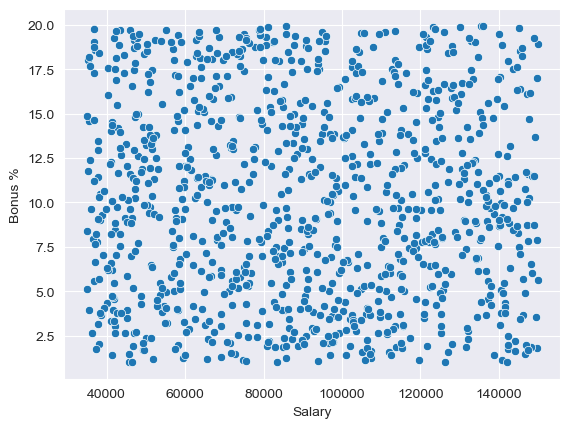

In [17]:
sns.scatterplot(x=empdf["Salary"], y=empdf["Bonus %"])
plt.show()

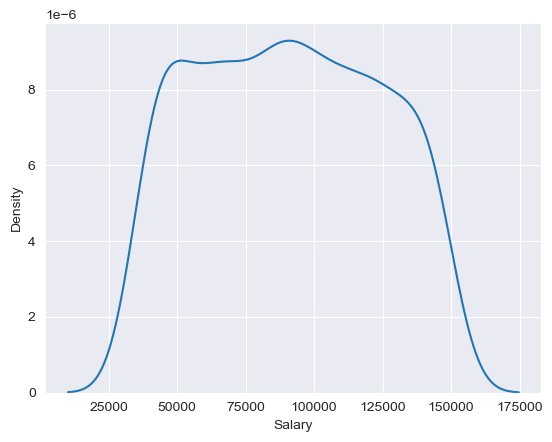

In [18]:
sns.kdeplot(empdf["Salary"])
plt.show()

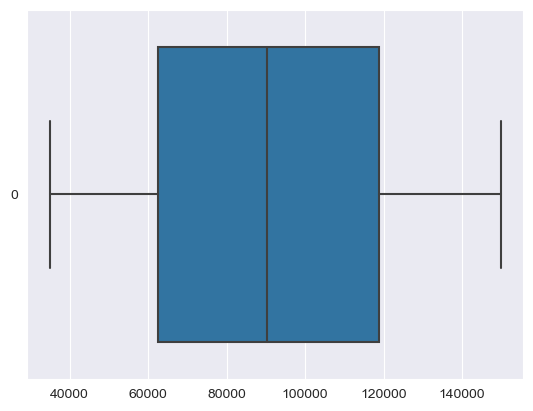

In [19]:
sns.boxplot(empdf["Salary"], orient="h")
plt.show()

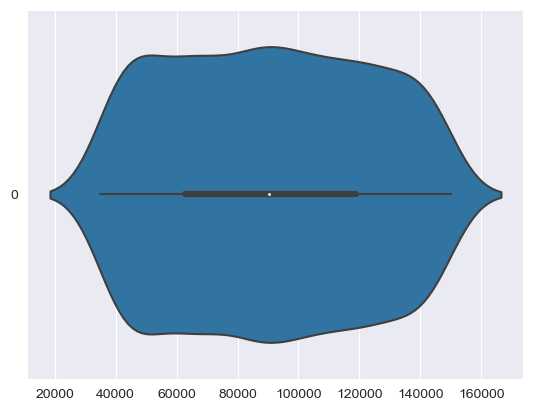

In [20]:
sns.violinplot(empdf["Salary"], orient="h")
plt.show()

## Detecting Outliers Using Box and Wisker Plot ( lower a and upper b bounds)
- a = Q1 - l*SIQR
- b = Q3 + l*SIQR

In [21]:
skewness = scs.skew(empdf["Salary"])
print(skewness)

0.04710908479869191


# Taking 1.5*IQR for the detection of outliers

In [22]:
Q1 = empdf["Salary"].quantile(0.25)
Q3 = empdf["Salary"].quantile(0.75)

# Lower Bound
lb = Q1 - 1.5*(Q3 - Q1)

# Upper Bound
ub = Q3 + 1.5*(Q3 - Q1)
print("Lower Bound: ", lb)
print("Upper Bound: ", ub)

Lower Bound:  -21577.875
Upper Bound:  202931.125


# Taking 1*IQR for the detection of outliers

In [23]:
Q1 = empdf["Salary"].quantile(0.25)
Q3 = empdf["Salary"].quantile(0.75)

# Lower Bound
lb = Q1 - 1*(Q3 - Q1)

# Upper Bound
ub = Q3 + 1*(Q3 - Q1)
print("Lower Bound: ", lb)
print("Upper Bound: ", ub)

Lower Bound:  6485.75
Upper Bound:  174867.5


# Taking 2*IQR for the detection of outliers

In [24]:
Q1 = empdf["Salary"].quantile(0.25)
Q3 = empdf["Salary"].quantile(0.75)

# Lower Bound
lb = Q1 - 2*(Q3 - Q1)

# Upper Bound
ub = Q3 + 2*(Q3 - Q1)
print("Lower Bound: ", lb)
print("Upper Bound: ", ub)

Lower Bound:  -49641.5
Upper Bound:  230994.75
